## Mean Shift Object Tracking using OpenCV

Object Tracking is process locating a moving object over time using camera. Mean Shift, consider set of points (pixel density like Histogram or Back Projection), and a small window is provided of any shape(eg. circle). Now, have to move the window to the area of max pixel density or max number of points.

So mean shift algorithm is as follows:

Step 1 - Pass initial location of target object and histogram back projected image to mean shift function

Step 2 - As the oject moves the histogram back projected image also changes

Step 3 - The mean shift function moves the window to new location with maximum probability density.


Disadvantage of Mean Shift -

1. Size of the window is always the same, will not change if object get close
2. Have to give initial position of region of interest. If unknow region of interest, difficult to apply mean shift method

So there is another shift method, CAM SHIFT(continous Adaptive Mean Shift) Method.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#capture video

cap = cv.VideoCapture('highway.mp4')

In [3]:
#take the first frame of the video

ret, frame = cap.read()

### Case: Want to track cars with windows using mean shift

##### Step 1 - passing of inital location, and histogram back projected image

##### Can say, this is disadvg of mean shift that we have to provide initial location. 

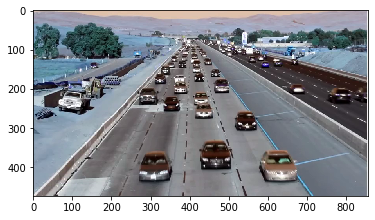

In [4]:
plt.imshow(frame)

In [5]:
#define the initial location of first window

x, y, width, height = 260, 350, 100, 100 #hard find the values.

#use these values as tracking window
track_window = (x, y, width, height)

In [6]:
#define the Region of Interest

roi = frame[y:y+height, x:x+width] #position of the window


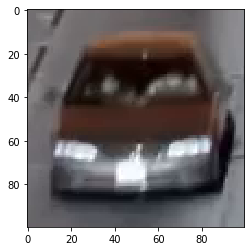

In [7]:
plt.imshow(roi)

### Histogram back projection - creates an image of same size as original image but of single channel of input image where each pixel corresponds to probability of that pixel beloging to our object i.e output image will have our ROI in more white color compared to remaining part of frame image 

##### Following steps to calculate histogram back projection

Step 1: convert ROI image to HSV color space (we want the HUE)

Step 2: Calculate the mask

Step 3: Calculate Histogram value.

All these steps will give Histogram back projected image, and will change with moving object

In [8]:
#convert to HSV color space

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

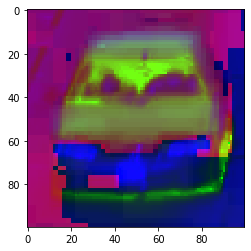

In [9]:
plt.imshow(hsv_roi)

In [10]:
#calculate the mask
#values:(image, lower_bound, upper_bound)
#Why we use InRangefunction?  - inRange fn. for histogram only HUE is considered from HSV(first channel), 
#also to avoid the false value due to low light or low light value. InRange fn discards the low light values.

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255)))  

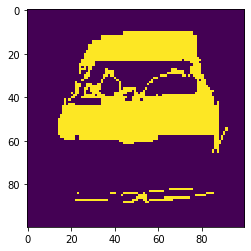

In [11]:
plt.imshow(mask)

In [12]:
#calculate ROI Histogram - read more
#values:(image, channels(we using first channel(hue), mask, hist_size(has value 0-179), hist_ranges)

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

#normalize these values:
#values:(image, destination, alpha start from, beta start, norm_type  )

roi_hist = cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX) #normalize the roi_hist from 0 to 255

In [73]:
#plt.imshow(roi_hist)

NExt step to read every frame, we calculate HSV value of frame as we did for first frme 

In [13]:
#Setup the termination criteria, either by 10 iteration or move by atleast 1 point
#set term_criteria for mean shift. 

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1) #provide 10 iteration or moving by 1 point

In [75]:
#open video

while (cap.isOpened()):
    
    #read frames from capture variable
    ret, frame = cap.read()
    
    if ret == True:
        
        #calculate hsv roi value.
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        #we calculate back project.
        #values:(image(hsv_image in form of list), channels(only HUE channel),hist_value(roi_hist we calculated), ranges(HSV color_range), scale=1, 
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        
        #apply mean shift to get new location
        #track_window we already defined up.
        #values:(image(from back_project),track_image, term_criteria(define outside while loop))
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        #once we have track window for car, we can draw rectangle will be visible on window
        #rectangle values:(original_image, pt1(draw from trackwindow, pt2, color, thickness)
        x, y, w, h = track_window
        final_image = cv.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 3)
        
        #can see back_project video
        cv.imshow('back_projected', dst)
        
        #show video
        cv.imshow('frame', final_image)
        
        #read till pressed q key
        if cv.waitKey(30) & 0xFF == ord('q'):
            break

cap.release()
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1